In [15]:
#Navigateing to csv file location
!cd drive

In [22]:
cd ANN

/content/drive/My Drive/Deep_Learning/ANN


In [23]:
#Importing the libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
#Importing the data set
data = pd.read_csv('QualityPrediction.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
#Target classes
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
data.shape

(1599, 12)

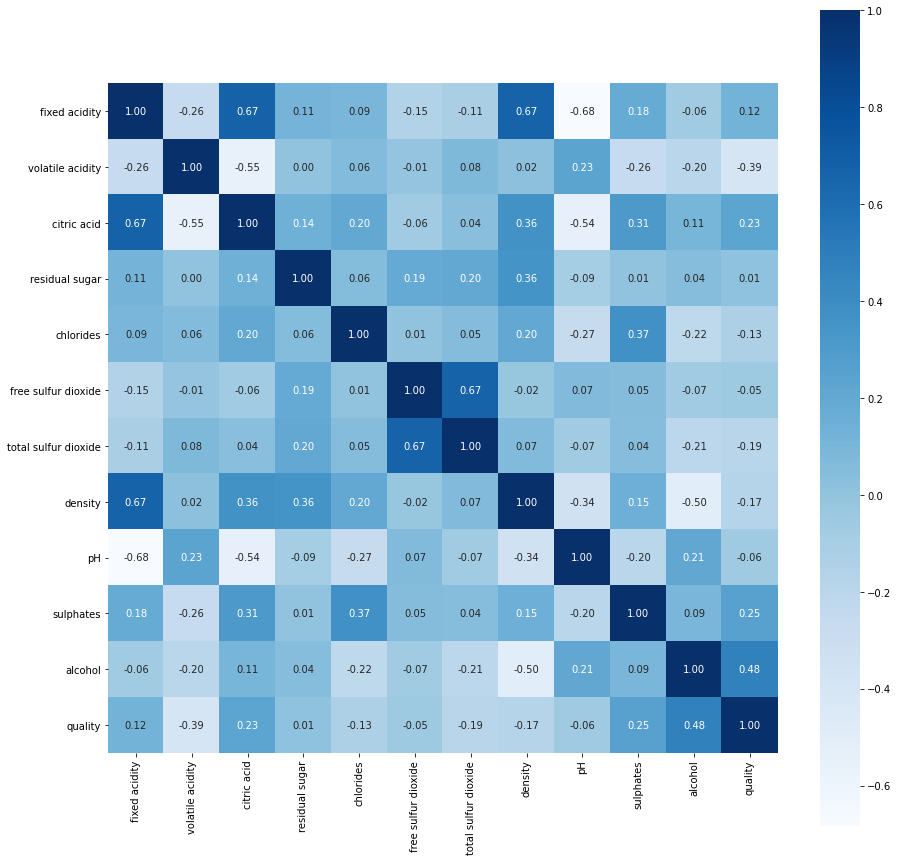

In [27]:
#Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot = True, square= True, fmt = '.2f', cmap = 'Blues')

In [28]:
#Seperating the target feature
X = data.drop('quality', axis = 1)
y = data.quality

In [30]:
y = y.apply(lambda x: 0 if x<6 else 1 )
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101)

In [32]:
#Feature scaling
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.fit(X_test)

In [43]:
#Building ANN Architechture
#1. Model creation
model = Sequential()

In [44]:

#Hidden layers
model.add(Dense(200, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

model.add(Dense(25, activation='sigmoid'))
model.add(Dropout(0.5))

#Output layer with 6 neurons
model.add(Dense(1, activation='sigmoid'))

In [45]:
#2. compile the model
model.compile(optimizer='SGD', loss = 'binary_crossentropy', metrics=['accuracy'])

In [46]:
X_train.shape

(1279, 11)

In [47]:
#3. model train
model.fit(X_train, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
128/128 [==============================] - 1s 4ms/step - loss: 0.7557 - accuracy: 0.5074
Epoch 2/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.5418
Epoch 3/20
128/128 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.5059
Epoch 4/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5199
Epoch 5/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.5012
Epoch 6/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5113
Epoch 7/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5207
Epoch 8/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5215
Epoch 9/20
128/128 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5371
Epoch 10/20
128/128 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5207

In [48]:
#Evaluation
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6219


[0.6779302358627319, 0.621874988079071]